In [49]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

class ExtendedKalmanFilter:
    ''' Extended Kalman filter class. '''
    def __init__(self, sigma, mu, R, Q):
        self.sigma = sigma
        self.mu = mu
        self.R = R
        self.Q = Q
    # First step is to make the data set
    def dataset(self, a):

        observations = []
        # x0 is a random variable of mean 1 and variance 2
        xk = np.random.normal(1, 2)
        for i in range(100):
            ek = np.random.normal(0, 1)
            vk = np.random.normal(0, 0.5)
            yk = (xk**2 + 1)**0.5 + vk 
            observations.append(yk)
            xk = a*xk + ek
        return np.array(observations)

    # Finding the jacobian
    def linearize_dynamics(self, state):
        return np.array([[state[1], state[0]], [0, 1]])

    # Finding the jacobian for the measurment
    def linearize_measurement(self, state):
        return np.array([[state[0]/(state[0]**2 + 1)**0.5, 0]])

    # propogating dynamics
    def propogation_dynamics(self, state):
        ek = np.random.normal(0, 1)
        xk1 = state[0] * state[1] + ek
        uk1 = np.array([xk1, state[1]])
        A = self.linearize_dynamics(state)
        sigmak1 = A @ self.sigma @ A.T + self.R
        return uk1, sigmak1

    def update_measurement(self, uk1, sigmak1, yk1):
        C = self.linearize_measurement(uk1)
        yk11 = yk1 - self.propogating_measurement(uk1) + C @ uk1
        kalman_gain = sigmak1 @ C.T @ np.linalg.inv(C @ sigmak1 @ C.T + self.Q)
        self.mu = uk1 + kalman_gain @ (yk11 - C @ uk1)
        self.sigma = (np.eye(2) - kalman_gain @ C) @ sigmak1 

    def propogating_measurement(self, state):
        vk = np.random.normal(0, 0.5)
        yk = (state[0]**2 + 1)**0.5 + vk
        return yk

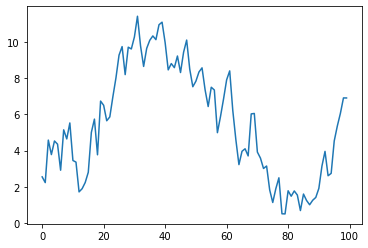

In [50]:
# create the dataset
observations = ekf.dataset(-1)

#Plotting the dataset
plt.plot(observations)

[-5.8084512  -0.99382353]


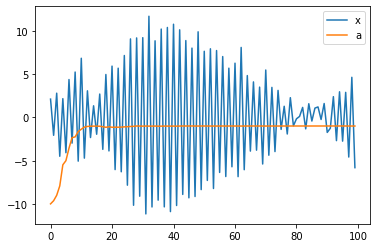

In [51]:
# Creating the class variable
R = np.diag([1,0])
Q = np.eye(1)/2
x0 = np.random.normal(1, 2)
a = -10
mu = np.array([x0, a])
sigma = np.eye(2)
ekf = ExtendedKalmanFilter(sigma, mu, R, Q)

state_time = []
for i in range(observations.shape[0]):
    state_time.append(ekf.mu)
    uk1, sigmak1 = ekf.propogation_dynamics(ekf.mu)
    ekf.update_measurement(uk1, sigmak1, observations[i])

print(state_time[-1])
# Plotting the state time
state_time = np.array(state_time)
plt.figure()
plt.plot(state_time[:, 0], label = 'x')
plt.plot(state_time[:, 1], label = 'a')
plt.legend()